In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Load data
iris_df = pd.read_csv('Iris.csv', index_col=0)
iris_df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


## Inspect the data
### Correlation Matrix

Text(0.5, 1.0, 'Correlation of Iris-type Features')

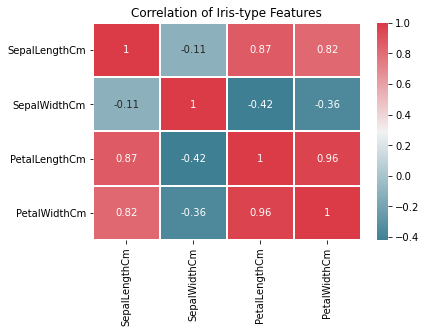

In [61]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(iris_df.corr(), cmap=colormap,linewidth=1, annot=True)
plt.title("Correlation of Iris-type Features")

* **Very Strong Postive Correlation:**
    * Petal Length and Petal Width


* **Strong Positive Correlation:**
    * Sepal Length vs. Petal Length
    * Sepal Length vs. Petal Width


* **Weak Negative Correlation:**
    * Sepal Length vs. Sepal Width


* **Moderate Weak Negative Correlation:**
    * Sepal Width vs. Petal Length
    * Sepal Width vs. Petal Width

## Apply PCA
### Scaling

In [37]:
# select and standardize features
df = iris_df.drop(columns=['Species'])
X = StandardScaler().fit_transform(df.values)

### PCA

In [38]:
# choose number of components to be generated
n_comps = 3
pca = PCA(n_components=n_comps)

# obtain components
principal_components = pca.fit_transform(X)

# transform the components into a pandas data frame
pca_df = pd.DataFrame(principal_components, index=iris_df.index)

# This is to include the plant id's as the row names in the PC'S
pca_df.head()

,0,1,2
Id,,,
1,-2.264542,0.505704,-0.121943
2,-2.086426,-0.655405,-0.227251
3,-2.367950,-0.318477,0.051480
4,-2.304197,-0.575368,0.098860
5,-2.388777,0.674767,0.021428


### PCA Correlation Matrix

<AxesSubplot:>

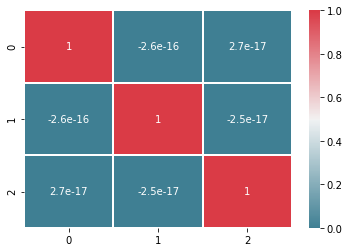

In [51]:
sns.heatmap(pca_df.corr(), cmap=colormap,linewidth=1, annot=True)

* From the correlation matrix of the PCA dataframe with the reduced numbers of variables, we can see that the principal components selected have pratically 0 correlation to oneanother as desired.

## Interpreting PCA

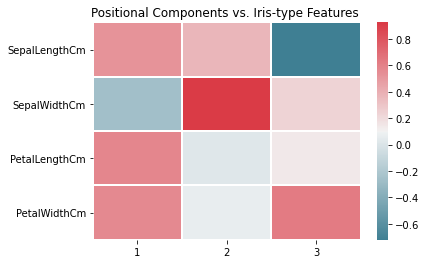

Text(0.5, 1.0, 'Correlation of Iris-type Features')

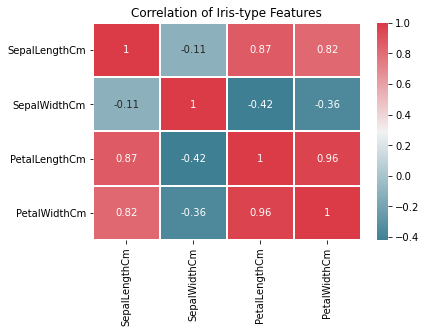

In [60]:
components = pd.DataFrame(pca.components_, columns=df.columns, index=range(1, n_comps+1)).transpose()
ax = sns.heatmap(components,cmap=colormap,linewidth=1)
plt.title("Positional Components vs. Iris-type Features ")
plt.show()

sns.heatmap(iris_df.corr(), cmap=colormap,linewidth=1, annot=True)
plt.title("Correlation of Iris-type Features")

From examining the two correlation plots, I think the Petal Length was possibily removed from the dataset as it has the highest correlation values, both postive and negative, in determining the Iris plant type. 

The next most influential feature would be the Petal Width, which could be Postitional Component 1 which has a strong influence in determine the Iris plants type which can be seen in the transformed PCA correlation plot. 

Positional Component 2 is possibily Sepal Length which an very strong positive correlation with an Iris plants Sepal Width. As it only has a strong influence on one single variable, this indicates that it possibly is the only characteristic used to determine one of the Iris type plant - possbility Iris-Setosa as from previous analysis this plant type is easiest to classify. Whereas, Iris-Verticolor and Iris-Viriginica are very similar and thus multiple features are needed to distinguish these two Iris plant types from each other.

Finally, Positional Component 3 must then be Sepal Width based on this logic which must contribute the least in determining Iris plant types.